In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor

In [37]:
df = pd.read_csv('AllMLAsy.csv')
dfm30 = df.query('theta == -30.0')
dfm20 = df.query('theta == -20.0')
dfm10 = df.query('theta == -10.0')
df0 = df.query('theta == 0.0')
dfp10 = df.query('theta == 10.0')
dfp20 = df.query('theta == 20.0')
dfp30 = df.query('theta == 30.0')

count_list = [len(dfm30), len(dfm20), len(dfm10), len(df0), len(dfp10), len(dfp20), len(dfp30)]
#count_list = [len(dfm10), len(df0), len(dfp10)]
count_min = min(count_list)

datam30 = dfm30.sample(n=count_min)
datam20 = dfm20.sample(n=count_min)
datam10 = dfm10.sample(n=count_min)
data0 = df0.sample(n=count_min)
datap10 = dfp10.sample(n=count_min)
datap20 = dfp20.sample(n=count_min)
datap30 = dfp30.sample(n=count_min)
#data = pd.concat([datam30,datam20,datam10,data0,datap10,datap20,datap30])
data = pd.concat([datam20,datam10,data0,datap10,datap20])
data['Ch2'] = data['Ch2']-780
data['Ch3'] = data['Ch3']-782
data['Ch4'] = data['Ch4']-777
data['Ch5'] = data['Ch5']-782
data['Ch6'] = data['Ch6']-776
data['Ch7'] = data['Ch7']-787
#data = pd.concat([datam10,data0,datap10])
#data = data.query('theta != 0.0')
data.describe()

,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,r,theta,sum,Asy
count,43925.000000,43925.000000,43925.000000,43925.000000,43925.000000,43925.000000,43925.000000,43925.0,43925.000000,43925.000000,43925.000000
mean,811.802163,223.435196,108.303722,44.421172,38.777689,45.428116,111.612954,15.0,0.000000,5255.978850,-0.036102
std,6.719087,24.256808,14.480169,7.745894,7.192939,7.780174,14.855652,0.0,14.142297,26.337847,0.102011
min,790.000000,117.000000,52.000000,17.000000,12.000000,0.000000,-1.000000,15.0,-20.000000,5201.000000,-0.426230
25%,808.000000,207.000000,99.000000,39.000000,34.000000,41.000000,102.000000,15.0,-10.000000,5236.000000,-0.104072
50%,812.000000,224.000000,107.000000,44.000000,38.000000,45.000000,111.000000,15.0,0.000000,5259.000000,-0.040323
75%,815.000000,240.000000,117.000000,49.000000,43.000000,50.000000,121.000000,15.0,10.000000,5278.000000,0.026087
max,989.000000,415.000000,194.000000,164.000000,149.000000,156.000000,190.000000,15.0,20.000000,5299.000000,0.915663


In [38]:

data = data.assign(phi37 = np.arctan(data['Ch3']/data['Ch7']))
data = data.assign(Asy37 = (data['Ch3']-data['Ch7'])/(data['Ch7']+data['Ch3']-782-787))
data = data.assign(Asy46 = (data['Ch4']-data['Ch6'])/(data['Ch4']+data['Ch6']-777-782))
data = data.assign(Asy23 = (data['Ch2']-data['Ch3'])/(data['Ch2']+data['Ch3']-782-780))
data = data.assign(Asy27 = (data['Ch2']-data['Ch7'])/(data['Ch7']+data['Ch2']-780-787))
data = data.assign(Ch34 = data['Ch3']+data['Ch4'])
data = data.assign(Ch67 = data['Ch6']+data['Ch7'])
y = data['theta']
#features = ['mppc1', 'mppc2', 'mppc3', 'sum', 'asy12', 'asy23', 'asy31', 'phi23']
features = ['Ch2','Ch3','Ch4','Ch5','Ch6','Ch7','Asy37','Asy46','Asy23','Asy27']
#features = ['mppc1', 'mppc2', 'mppc3']
x = data[features]
train_x, val_x, train_y, val_y = train_test_split(x,y, random_state=0)

#params = {'metric':'rmse'}
#model = LGBMRegressor(**params)
model = LGBMRegressor(random_state=0)
model.fit(train_x,train_y)

preds = model.predict(val_x)
rmse = np.sqrt(mean_squared_error(val_y, preds))
print(rmse)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1682
[LightGBM] [Info] Number of data points in the train set: 32943, number of used features: 10
[LightGBM] [Info] Start training from score 0.010624
12.85116049260748


theta 20.0 counts 2203
17.495040241821886
theta 10.0 counts 2192
10.446300658502588
theta 0.0 counts 2170
4.414640241338539
theta -10.0 counts 2201
9.521498122943422
theta -20.0 counts 2216
17.236705453079146


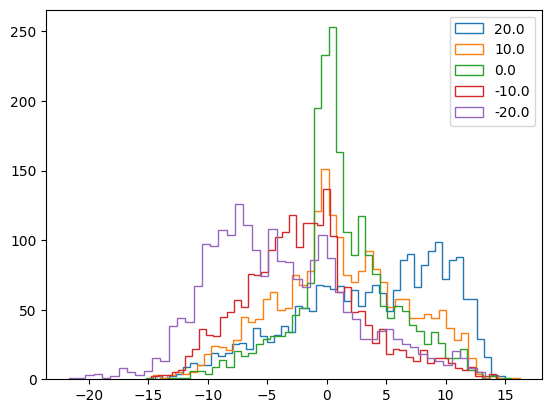

In [39]:
def get_each_rmse(theta, preds, val_y):

    p_y = preds.tolist()
    v_y = val_y.tolist()

    p_y_theta = []
    for i in range(len(v_y)):
        if v_y[i] == theta:
            p_y_theta.append(p_y[i])
    #print(p_y_theta)

    theta_array = []
    for i in range(len(p_y_theta)):
        theta_array.append(theta)
    print('theta', theta, 'counts', len(theta_array))

    rmse_theta = np.sqrt(mean_squared_error(p_y_theta, theta_array))
    print(rmse_theta)
    plt.hist(p_y_theta, bins=50, histtype='step', label=theta)

#get_each_rmse(30.0, preds, val_y)
get_each_rmse(20.0, preds, val_y)
get_each_rmse(10.0, preds, val_y)    
get_each_rmse(0.0, preds, val_y)
get_each_rmse(-10.0, preds, val_y)
get_each_rmse(-20.0, preds, val_y)
#get_each_rmse(-30.0, preds, val_y)
plt.legend()